<a href="https://colab.research.google.com/github/Jung0Jin/Pytorch_study/blob/master/6.%ED%95%A9%EC%84%B1%EA%B3%B1%EC%8B%A0%EA%B2%BD%EB%A7%9D%ED%99%9C%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#6.합성곱신경망활용

##6.1 데이터 다운로드

아래 링크에서 캐글 [Cat and Dog] 데이터를 다운로드 받으면 된다. train데이터만 이용하겠다.

https://www.kaggle.com/tongpython/cat-and-dog

* 데이터 설명

This dataset is for running the code from this site: https://becominghuman.ai/building-an-image-classifier-using-deep-learning-in-python-totally-from-a-beginners-perspective-be8dbaf22dd8.

This is how to show a picture from the training set: display(Image('../input/cat-and-dog/trainingset/trainingset/dogs/dog.423.jpg'))

From the test set: display(Image('../input/cat-and-dog/testset/testset/cats/cat.4453.jpg'))

See an example of using this dataset. https://www.kaggle.com/tongpython/nattawut-5920421014-cat-vs-dog-dl

* 특징 데이터

고양이 이미지 : 4000개 

개 이미지 : 4000개

너무 오래걸려서 각각 100개만 담았다.

캐글 형님들 코드를 참고했다.

https://www.kaggle.com/shivashi11/densenet121-in-pytorch-98-accuracy

##6.2 데이터 불러오기

In [0]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torch.nn as nn

from torchvision import transforms, datasets

In [0]:
train_data_dir = '/content/drive/My Drive/데이터/Cat and Dog/training_set_sample' # 경로 정하기

Transforms : 이미지를 다룰 때 문제가 되는 것이 이미지 샘플의 크기가 동일하지 않다는 것이다. Transforms는 이런 문제를 해결해주는 라이브러리다.

파이토치 튜토리얼을 보면 Customer Transforms 에 대해 나와 있지만, 그냥 라이브러리 가져다 쓰겠다. 

In [0]:
transform = transforms.Compose([transforms.Resize(255),  
                                transforms.CenterCrop(224),  
                                transforms.ToTensor()])

Resize(255) : (작은 이미지, 큰 이미지)의 튜플로 지정하면 지정한 크기로 이미지가 조정이 되고, 정수로 지정하면 작은값을 기준으로 세로나 가로를 맞춘 후 나머지를 동일한 비율로 변환한다.

CenterCrop(224) : 가운데 부분을 주어진 크기(224)로 자른다. 

ToTensor() : 이미지 데이터를 tensor로 바꿔준다.

In [0]:
dataset = datasets.ImageFolder(train_data_dir, transform=transform)
# ImageFolder는 아래와 같이 배열된 이미지 데이터를 가져온다.

root/dog/xxx.png

root/dog/xxy.png

root/dog/xxz.png


root/cat/123.png

root/cat/nsdf3.png

root/cat/asd932_.png

In [50]:
dataset

Dataset ImageFolder
    Number of datapoints: 202
    Root location: /content/drive/My Drive/데이터/Cat and Dog/training_set_sample
    StandardTransform
Transform: Compose(
               Resize(size=255, interpolation=PIL.Image.BILINEAR)
               CenterCrop(size=(224, 224))
               ToTensor()
           )

In [51]:
len(dataset)

202

In [52]:
dataset[0]

(tensor([[[0.1490, 0.2431, 0.2863,  ..., 0.3137, 0.2824, 0.2392],
          [0.1373, 0.1961, 0.2431,  ..., 0.3020, 0.3137, 0.2627],
          [0.1255, 0.1412, 0.1725,  ..., 0.2863, 0.2784, 0.2471],
          ...,
          [0.0588, 0.0588, 0.0588,  ..., 0.3451, 0.3608, 0.3451],
          [0.0784, 0.0784, 0.0745,  ..., 0.3529, 0.3490, 0.3059],
          [0.0980, 0.1020, 0.0941,  ..., 0.3373, 0.3137, 0.2824]],
 
         [[0.1804, 0.2745, 0.3176,  ..., 0.3451, 0.3176, 0.2667],
          [0.1686, 0.2275, 0.2745,  ..., 0.3412, 0.3569, 0.2941],
          [0.1569, 0.1725, 0.2039,  ..., 0.3333, 0.3255, 0.2863],
          ...,
          [0.0588, 0.0588, 0.0588,  ..., 0.2745, 0.2902, 0.2863],
          [0.0784, 0.0784, 0.0745,  ..., 0.2824, 0.2784, 0.2471],
          [0.0980, 0.1020, 0.0941,  ..., 0.2667, 0.2431, 0.2235]],
 
         [[0.1882, 0.2863, 0.3294,  ..., 0.4314, 0.4039, 0.3647],
          [0.1765, 0.2392, 0.2863,  ..., 0.4275, 0.4431, 0.3804],
          [0.1647, 0.1843, 0.2157,  ...,

dataset의 첫번째 인덱스를 열어보니

텐서 값과 정수가 label이 있다.

In [53]:
dataset[0][0]

tensor([[[0.1490, 0.2431, 0.2863,  ..., 0.3137, 0.2824, 0.2392],
         [0.1373, 0.1961, 0.2431,  ..., 0.3020, 0.3137, 0.2627],
         [0.1255, 0.1412, 0.1725,  ..., 0.2863, 0.2784, 0.2471],
         ...,
         [0.0588, 0.0588, 0.0588,  ..., 0.3451, 0.3608, 0.3451],
         [0.0784, 0.0784, 0.0745,  ..., 0.3529, 0.3490, 0.3059],
         [0.0980, 0.1020, 0.0941,  ..., 0.3373, 0.3137, 0.2824]],

        [[0.1804, 0.2745, 0.3176,  ..., 0.3451, 0.3176, 0.2667],
         [0.1686, 0.2275, 0.2745,  ..., 0.3412, 0.3569, 0.2941],
         [0.1569, 0.1725, 0.2039,  ..., 0.3333, 0.3255, 0.2863],
         ...,
         [0.0588, 0.0588, 0.0588,  ..., 0.2745, 0.2902, 0.2863],
         [0.0784, 0.0784, 0.0745,  ..., 0.2824, 0.2784, 0.2471],
         [0.0980, 0.1020, 0.0941,  ..., 0.2667, 0.2431, 0.2235]],

        [[0.1882, 0.2863, 0.3294,  ..., 0.4314, 0.4039, 0.3647],
         [0.1765, 0.2392, 0.2863,  ..., 0.4275, 0.4431, 0.3804],
         [0.1647, 0.1843, 0.2157,  ..., 0.4196, 0.4118, 0.

In [54]:
dataset[0][0].size()

torch.Size([3, 224, 224])

tensor만 가져와서 사이즈를 보니 3채널에 224 X 224 matrix임을 알 수 있다.

In [55]:
# train_dataset, val_dataset로 나누는 비율을 정하기
train_val_ratio = 0.8
train_size = int(len(dataset) * train_val_ratio)
val_size = len(dataset) - train_size
print(train_size, val_size)

161 41


In [0]:
# train_dataset, val_dataset로 나누기
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

In [0]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size=16,
                                           shuffle=True,
                                           drop_last=True)
val_loader = torch.utils.data.DataLoader(dataset = val_dataset,
                                         batch_size = len(val_dataset))

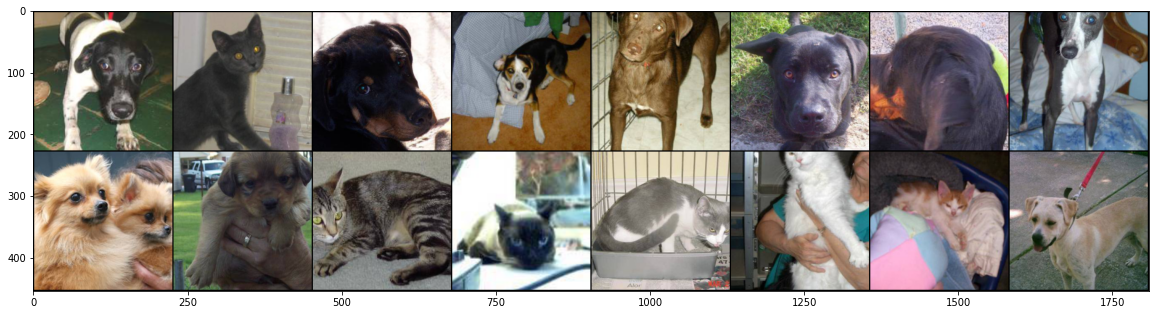

In [58]:
# 이미지를 봐보자.

def imshow(inp, title=None):
  """Imshow for Tensor."""
  inp = inp.numpy().transpose((1,2,0)) # input 값을 numpy 배열로 바꾸고, transpose로 차원을 변경해준다.
  plt.figure(figsize=(20,150))
  plt.imshow(inp)

inputs, classes = next(iter(train_loader))  

# Make a grid from batch
out = torchvision.utils.make_grid(inputs, scale_each=True)

imshow(out)

이때 transpose((1,2,0))인 것은 기존 (0,1,2)의 차원을 (1,2,0)의 차원으로 바꾼다는 소리다.

그냥 np.transpose(matrix) 이런식으로 넣으면 matrix.shape이 만약 (7,5,2) 이면 바뀐 차원은 (2,5,7)이다.

이거에 대한 설명은 https://superelement.tistory.com/18 여기 나와있다.

In [59]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [0]:
learning_rate = 0.001
epochs = 10

##6.3 모델 1

In [0]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()

    '''
    layer 1
    Image shape = (batch_size, 224, 224, 3)
    Conv layer = (batch_size, 224, 224, 6)
    Pool layer = (batch_size, 112, 112, 6)
    '''
    self.layer1 = nn.Sequential(
        nn.Conv2d(3, 6, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    
    '''
    layer 2
    Image shape = (batch_size, 112, 112, 6)
    Conv layer = (batch_size, 112, 112, 9)
    Pool layer = (batch_size, 56, 56, 9)
    '''
    self.layer2 = nn.Sequential(
        nn.Conv2d(6, 9, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )

    '''
    layer 3
    Image shape = (batch_size, 56, 56, 9)
    fully connected layer = (56 * 56 * 9, 2)    
    '''
    self.fc = nn.Linear(56 * 56 * 9, 2, bias=True)

    # 전결합층 한정으로 가중치 초기화
    nn.init.xavier_uniform_(self.fc.weight)

  def forward(self, x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = out.view(out.size(0), -1) # 전결합층을 위해서 Flatten
    out = self.fc(out)
    return out

In [0]:
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [63]:
# 이 모델에서 파라미터는 총 몇개일까?
# 가중치 매개변수의 총 수 : 커널의 높이 X 커널의 너비 X 입력 데이터의 채널 X 합성곱 연산에 사용하는 커널의 수
print((3*3*3*6)+6+(3*3*6*9)+9+(56*56*9*2)+2)

# 모델의 state_dict 출력
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\n", model.state_dict()[param_tensor].size())

57113
Model's state_dict:
layer1.0.weight 
 torch.Size([6, 3, 3, 3])
layer1.0.bias 
 torch.Size([6])
layer2.0.weight 
 torch.Size([9, 6, 3, 3])
layer2.0.bias 
 torch.Size([9])
fc.weight 
 torch.Size([2, 28224])
fc.bias 
 torch.Size([2])


In [64]:
plot_list = {'train':[], 'val':[], 'accuracy':[]}

for epoch in range(epochs):
  model.train()
  train_losses = []  
  for batch_number, (img, label) in enumerate(train_loader):
    img = img.to(device)
    label = label.to(device)

    optimizer.zero_grad()
    output = model(img)
    train_loss = criterion(output, label)
    train_loss.backward()
    optimizer.step()

    train_losses.append(train_loss.item())
    print(batch_number)

  with torch.no_grad():
    model.eval()
    val_losses = []
    for batch_number, (img, label) in enumerate(val_loader):
      img = img.to(device)
      label = label.to(device)

      output = model(img)
      val_loss = criterion(output, label)
      val_losses.append(val_loss.item())
  
      ps = torch.exp(output)
      top_ps, top_class = ps.topk(1, dim=1)
    equality = top_class == label.view(*top_class.shape)
    accuracy = torch.mean(equality.type(torch.FloatTensor)).item()
    
  plot_list['train'].append(sum(train_losses)/len(train_losses))
  plot_list['val'].append(sum(val_losses)/len(val_losses))
  plot_list['accuracy'].append(accuracy)

  print(f'{epoch+1} epoch train loss = {sum(train_losses)/len(train_losses)}')
  print(f'{epoch+1} epoch val loss = {sum(val_losses)/len(val_losses)}')
  print(f'{epoch+1} epoch accuracy = {accuracy}')
  print('-'*50)

0
1
2
3
4
5
6
7
8
9
1 epoch train loss = 0.790019828081131
1 epoch val loss = 0.7515223622322083
1 epoch accuracy = 0.3658536672592163
--------------------------------------------------
0
1
2
3
4
5
6
7
8
9
2 epoch train loss = 0.7518290162086487
2 epoch val loss = 0.7798346877098083
2 epoch accuracy = 0.3658536672592163
--------------------------------------------------
0
1
2
3
4
5
6
7
8
9
3 epoch train loss = 0.6740175127983093
3 epoch val loss = 0.7359344363212585
3 epoch accuracy = 0.3658536672592163
--------------------------------------------------
0
1
2
3
4
5
6
7
8
9
4 epoch train loss = 0.6349300742149353
4 epoch val loss = 0.6241764426231384
4 epoch accuracy = 0.7560975551605225
--------------------------------------------------
0
1
2
3
4
5
6
7
8
9
5 epoch train loss = 0.6115679740905762
5 epoch val loss = 0.6138966679573059
5 epoch accuracy = 0.707317054271698
--------------------------------------------------
0
1
2
3
4
5
6
7
8
9
6 epoch train loss = 0.5774739205837249
6 epoch

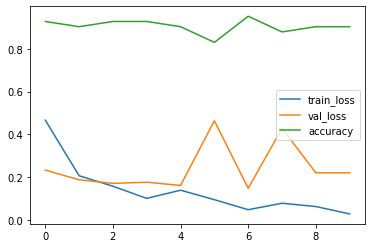

In [75]:
plt.plot(plot_list['train'], label='train_loss')
plt.plot(plot_list['val'], label='val_loss')
plt.plot(plot_list['accuracy'], label='accuracy')
plt.legend()
plt.show()

##6.4 모델 2 (Resnet)

In [0]:
from torchvision import models

In [0]:
resnet = models.resnet18(pretrained = True)

In [78]:
print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [0]:
for params in resnet.parameters():
  params.requires_grad = False

In [0]:
from collections import OrderedDict

classifier = nn.Sequential(OrderedDict([
                                ('fc1', nn.Linear(512,256)),
                                ('relu', nn.ReLU()),
                                ('fc2', nn.Linear(256,2)),
                                ('Output',nn.LogSoftmax(dim=1))
]))

resnet.fc = classifier

In [81]:
print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [0]:
model = resnet.to(device)
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [83]:
plot_list = {'train':[], 'val':[], 'accuracy':[]}

for epoch in range(epochs):
  model.train()
  train_losses = []  
  for batch_number, (img, label) in enumerate(train_loader):
    img = img.to(device)
    label = label.to(device)

    optimizer.zero_grad()
    output = model(img)
    train_loss = criterion(output, label)
    train_loss.backward()
    optimizer.step()

    train_losses.append(train_loss.item())
    print(batch_number)

  with torch.no_grad():
    model.eval()
    val_losses = []
    for batch_number, (img, label) in enumerate(val_loader):
      img = img.to(device)
      label = label.to(device)

      output = model(img)
      val_loss = criterion(output, label)
      val_losses.append(val_loss.item())
  
      ps = torch.exp(output)
      top_ps, top_class = ps.topk(1, dim=1)
    equality = top_class == label.view(*top_class.shape)
    accuracy = torch.mean(equality.type(torch.FloatTensor)).item()
    
  plot_list['train'].append(sum(train_losses)/len(train_losses))
  plot_list['val'].append(sum(val_losses)/len(val_losses))
  plot_list['accuracy'].append(accuracy)

  print(f'{epoch+1} epoch train loss = {sum(train_losses)/len(train_losses)}')
  print(f'{epoch+1} epoch val loss = {sum(val_losses)/len(val_losses)}')
  print(f'{epoch+1} epoch accuracy = {accuracy}')
  print('-'*50)

0
1
2
3
4
5
6
7
8
9
1 epoch train loss = 0.4720632493495941
1 epoch val loss = 0.37796127796173096
1 epoch accuracy = 0.8536585569381714
--------------------------------------------------
0
1
2
3
4
5
6
7
8
9
2 epoch train loss = 0.3219438441097736
2 epoch val loss = 0.35735562443733215
2 epoch accuracy = 0.8292682766914368
--------------------------------------------------
0
1
2
3
4
5
6
7
8
9
3 epoch train loss = 0.1813259556889534
3 epoch val loss = 0.41920626163482666
3 epoch accuracy = 0.8292682766914368
--------------------------------------------------
0
1
2
3
4
5
6
7
8
9
4 epoch train loss = 0.10762091763317586
4 epoch val loss = 0.1344580054283142
4 epoch accuracy = 0.9268292784690857
--------------------------------------------------
0
1
2
3
4
5
6
7
8
9
5 epoch train loss = 0.08338458836078644
5 epoch val loss = 0.20026086270809174
5 epoch accuracy = 0.9268292784690857
--------------------------------------------------
0
1
2
3
4
5
6
7
8
9
6 epoch train loss = 0.0882728803902864

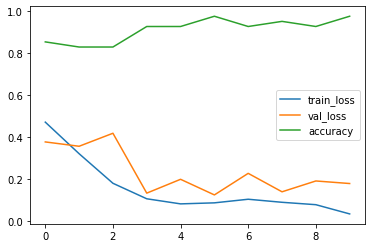

In [84]:
plt.plot(plot_list['train'], label='train_loss')
plt.plot(plot_list['val'], label='val_loss')
plt.plot(plot_list['accuracy'], label='accuracy')
plt.legend()
plt.show()

오늘의 깨달음

1. MNIST 데이터를 벗어나면 이미지의 픽셀 수부터가 달라지고 엄청난 연산이 필요하다. MNIST의 픽셀은 28 X 28, 오늘의 데이터는 244 X 244

2. 솔직히 다들 개, 고양이 말하길래 8000 이미지 정도면 화장실 다녀오면 되는 줄 알았다 ㅎ..

2. transfer learning 할 때 fine tuning 하는게 글로만 보다가 실제 겪어 본 경험 + 가져다 쓰기만 하는 것도 모델이 깊으면 뚫고 가는게 쉽지 않다는 것